In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

## PREPING THE DATA

In [2]:
house_designs = tf.keras.utils.image_dataset_from_directory('home-styles', batch_size=64, label_mode='categorical')

Found 811536 files belonging to 17 classes.


### Catergories Identified

The provided imagery data is labbeled data. The following labels help the ML model to learn about the different images and the classes they belong to.

In [3]:
class_names = house_designs.class_names
for i, class_name in enumerate(class_names):
    print(f"Class name: {class_name}, Integer label: {i}")

Class name: Baby & Kids, Integer label: 0
Class name: Basement, Integer label: 1
Class name: Bath, Integer label: 2
Class name: Bedroom, Integer label: 3
Class name: Dining, Integer label: 4
Class name: Entry, Integer label: 5
Class name: Exterior, Integer label: 6
Class name: Garage & Shed, Integer label: 7
Class name: Gym, Integer label: 8
Class name: Home Bar, Integer label: 9
Class name: Home Office, Integer label: 10
Class name: Kitchen, Integer label: 11
Class name: Laundry, Integer label: 12
Class name: Living, Integer label: 13
Class name: Outdoor, Integer label: 14
Class name: Storage & Closet, Integer label: 15
Class name: Wine Cellar, Integer label: 16


### Visualizing The Data

The labels shown with the images are one-hot encoded form of the data. These one-hot encoded 1s and 0s identify the decimal number different classes are labelled with.
For example: [0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.0] = 11 which is "Class name: Kitchen"

In [4]:
import numpy as np

data_iterator = house_designs.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

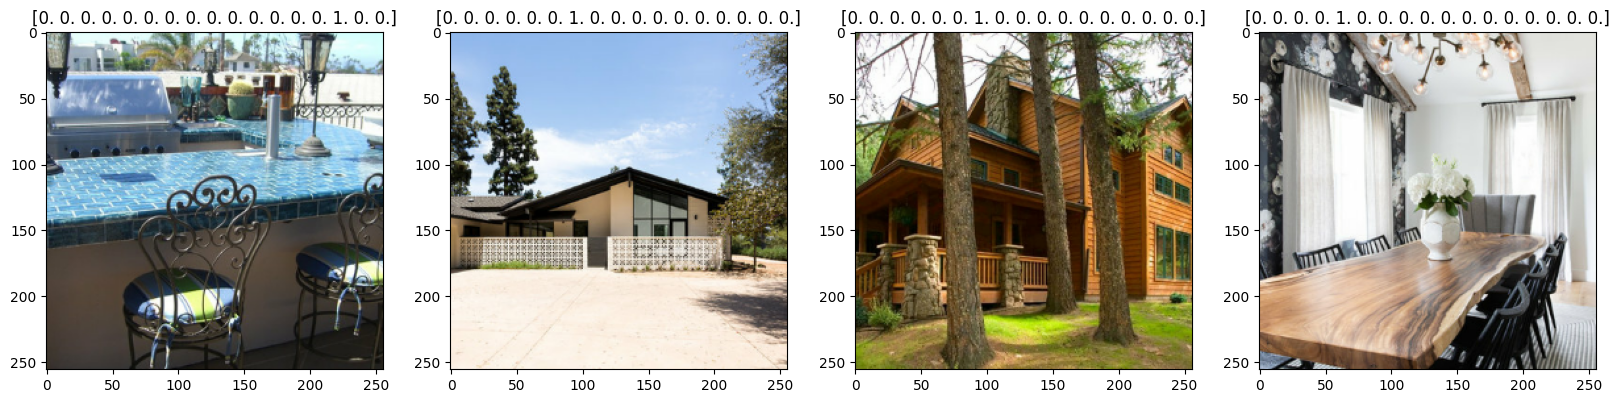

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Pre processing the images

In the step the images are processed where the pixel values typically range from 0 to 255. By dividing by 255.0, images pixel values are scaled the to a range between 0 and 1. These values of 0 and 1 help with the building the activation functions using sigmoid and relu techniques in with nerual networks. 

Normalizing also helps the pixel values helps in stabilizing and speeding up the training process.

In [7]:
#Normalization of the images
house_designs = house_designs.map(lambda x, y: (x / 255.0, y))

In [39]:
train_size = int(len(house_designs)*.8)
val_size = int(len(house_designs)*.2)

train = house_designs.take(train_size)
val = house_designs.skip(train_size).take(val_size)

In [52]:
def image_augmentation(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.2)
    image = tf.image.random_saturation(image, 0.5, 1.0)
    return image, label

In [53]:
augmented_train = train.map(image_augmentation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


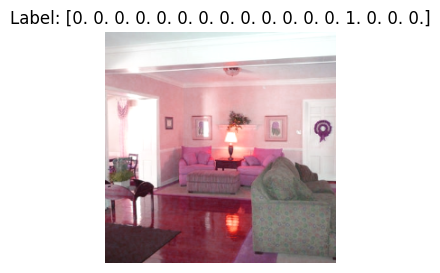

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


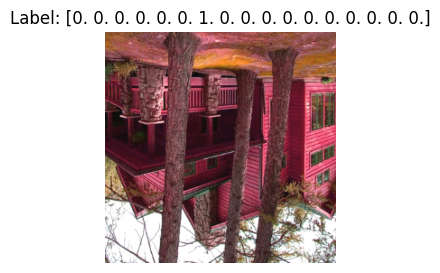

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


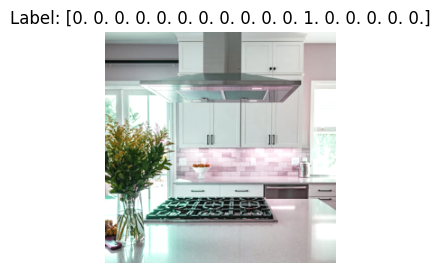

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


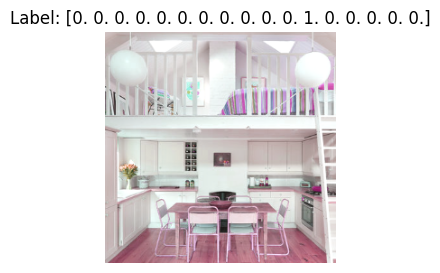

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


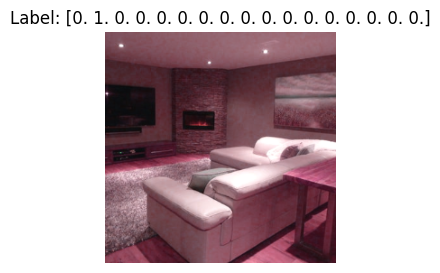

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


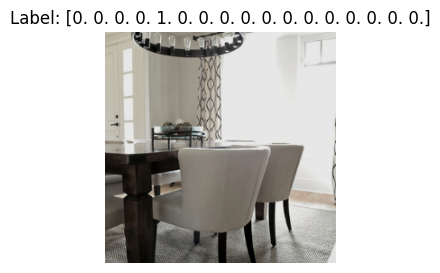

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


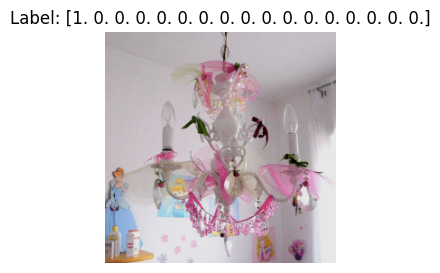

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


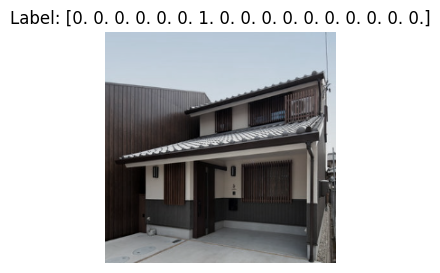

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


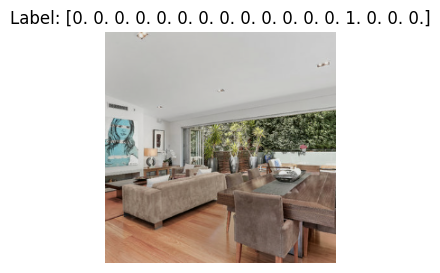

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


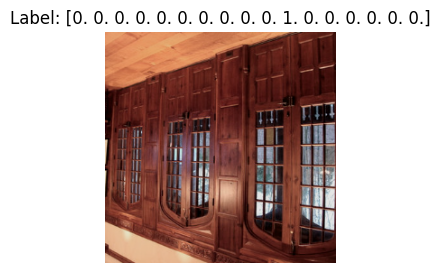

In [67]:
# Visualizing the augmented training dataset
for images, labels in augmented_train.take(2):
    for i in range(min(5, len(images))):
        image = images[i].numpy() 
        label = labels[i].numpy()
        plt.subplots(figsize=(3,3))
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')  # Hide axes
        plt.show()

### CNN Model Creation Process

The function <b>plot_history</b>, is used to visualize the training history of a neural network model. It takes the history object returned by the fit function when training a Keras model in TensorFlow.

In [68]:
def plot_history(history):
    # Figure Configuration to show two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    # Plot one to visualize the loss from the history
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)
    ax1.legend(['Loss', 'Val_Loss'])
    # Plot two to visualize the accuracy from the history
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend(['Accuracy', 'Val_Accuracy'])
    plt.show()

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
def train_model(filter_1, filter_2, filter_3, kernel, num_of_epochs, training_dataset, validation_dataset):
    model = Sequential()
    model.add(Conv2D(filter_1, (kernel,kernel), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_2, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_3, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    history = model.fit(training_dataset, epochs=num_of_epochs, validation_data=validation_dataset, callbacks=[tensorboard_callback])
    return model, history

In [71]:
model, history = train_model(32, 64, 64, 3, 10, augmented_train, val)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,806,545 (56.48 MB)

 Trainable params: 14,806,545 (56.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1716044672.229461    2029 service.cc:145] XLA service 0x7f82e8004f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716044672.229549    2029 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1


    1/10144 ━━━━━━━━━━━━━━━━━━━━ 29:20:41 10s/step - accuracy: 0.1562 - loss: 0.6937

I0000 00:00:1716044680.281080    2029 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2957s 290ms/step - accuracy: 0.3987 - loss: 0.1630 - val_accuracy: 0.5101 - val_loss: 0.1361
Epoch 2/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 3079s 303ms/step - accuracy: 0.5167 - loss: 0.1343 - val_accuracy: 0.5346 - val_loss: 0.1303
Epoch 3/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2615s 258ms/step - accuracy: 0.5490 - loss: 0.1266 - val_accuracy: 0.5406 - val_loss: 0.1292
Epoch 4/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2573s 254ms/step - accuracy: 0.5668 - loss: 0.1224 - val_accuracy: 0.5500 - val_loss: 0.1274
Epoch 5/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2556s 252ms/step - accuracy: 0.5801 - loss: 0.1194 - val_accuracy: 0.5483 - val_loss: 0.1281
Epoch 6/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2566s 253ms/step - accuracy: 0.5917 - loss: 0.1169 - val_accuracy: 0.5554 - val_loss: 0.1270
Epoch 7/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2894s 285ms/step - accuracy: 0.6001 - loss: 0.1148 - val_accuracy: 0.5536 - val_loss: 0.1272
Epoch 8/10
10144/10144 ━━━━━━━━━━━━━━━━━━━━ 2555s 25

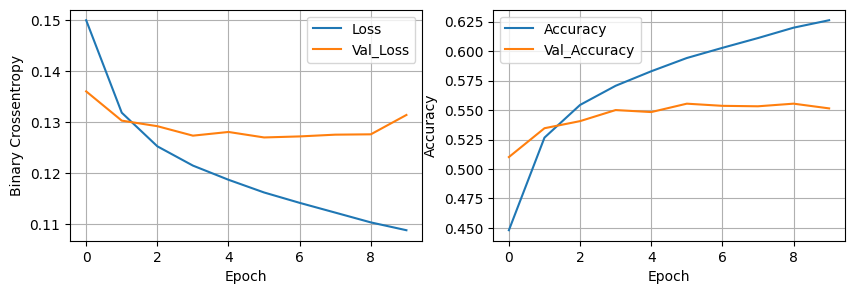

In [72]:
plot_history(history)

In [73]:
model.save('house-styles-models/categorical-model.keras')

## Testing the Model

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
model = tf.keras.models.load_model('house-styles-models/categorical-model.keras')

In [4]:
def preprocess_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

In [5]:
def predict_image(image_path, model):
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    # Perform inference
    prediction = model.predict(preprocessed_img)
    return prediction

In [6]:
image_path = 'bathroom-test.jpeg'
prediction = predict_image(image_path, model)

I0000 00:00:1716261018.673594    2049 service.cc:145] XLA service 0x7f0a9c004de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716261018.673648    2049 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


I0000 00:00:1716261019.206133    2049 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [7]:
print(prediction)

[[7.6541509e-03 3.4566242e-03 8.4713274e-01 1.0756124e-02 1.5612770e-02
  6.3880687e-03 7.1069441e-04 4.3478902e-04 3.3876644e-03 2.2478906e-02
  1.8719919e-02 9.3666613e-03 1.2551927e-02 2.6458154e-02 1.8388456e-03
  8.5830856e-03 4.4687907e-03]]


In [8]:
predicted_index = np.argmax(prediction)

In [9]:
predicted_index

2

2 = Bath